# ДЗ №7 по теме перестройки в геноме

В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

### Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).  
Симуляция заключается в следующем:  
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
np.random.seed(7)
plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
def rotate(seq, i, j):
    seq[i : j + 1] = -seq[i : j + 1][::-1]


def gen(n, k):
    seq = np.arange(1, n + 1)
    for _ in range(k):
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        if i > j:
            i, j = j, i
        rotate(seq, i, j)
    return seq

In [4]:
gen(10, 1)

array([  1,   2,   3,   4, -10,  -9,  -8,  -7,  -6,  -5])

### Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [5]:
def sort(seq):
    n = len(seq)
    i = 0
    n_rotations = 0
    while i < n:
        if seq[i] == i + 1:
            i += 1
        else:
            j = i
            while abs(seq[j]) != i + 1:
                j += 1
            rotate(seq, i, j)
            n_rotations += 1
    return n_rotations

In [6]:
seq = gen(10, 1)
sort(seq)

1

### Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния.  Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.  
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).  
Постарайтесь объяснить, что происходит.

In [7]:
def get_rotations(n, ks, n_seqs):
    return [[sort(gen(n, k)) for _ in range(n_seqs)] for k in tqdm(ks)]

In [8]:
n = 1000
ks = np.arange(0, 50, 1)
n_seqs = 5
threshold = 25

In [9]:
n_rotations = get_rotations(n, ks, n_seqs)

  0%|          | 0/50 [00:00<?, ?it/s]

In [10]:
n_rotations_mean = np.mean(n_rotations, axis=1)

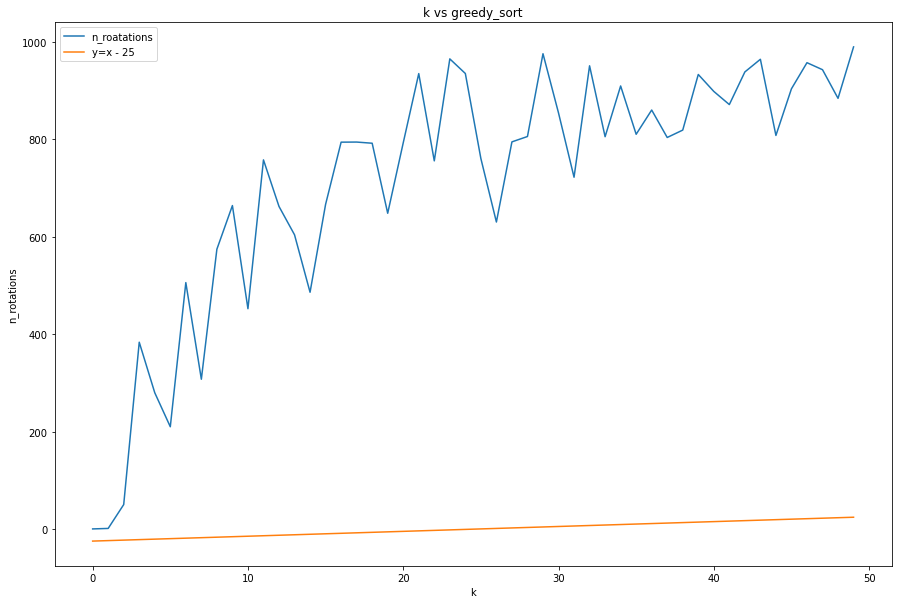

In [11]:
plt.plot(ks, n_rotations_mean, label="n_roatations")
plt.plot(ks, ks - threshold, label=f"y=x - {threshold}")

plt.title("k vs greedy_sort")
plt.ylabel("n_rotations")
plt.xlabel("k")
plt.legend()
plt.show()

При малом кол-ве переворотов алгоритм делает заметно больше переворотов, чем было сделано при генерации последовательности, т.к. жадный алгоритм не является оптимальным.

In [12]:
n = 1000
ks = np.arange(0, 2 * n, 10)
n_seqs = 5
threshold = 25

In [13]:
n_rotations = get_rotations(n, ks, n_seqs)

  0%|          | 0/200 [00:00<?, ?it/s]

In [14]:
n_rotations_mean = np.mean(n_rotations, axis=1)

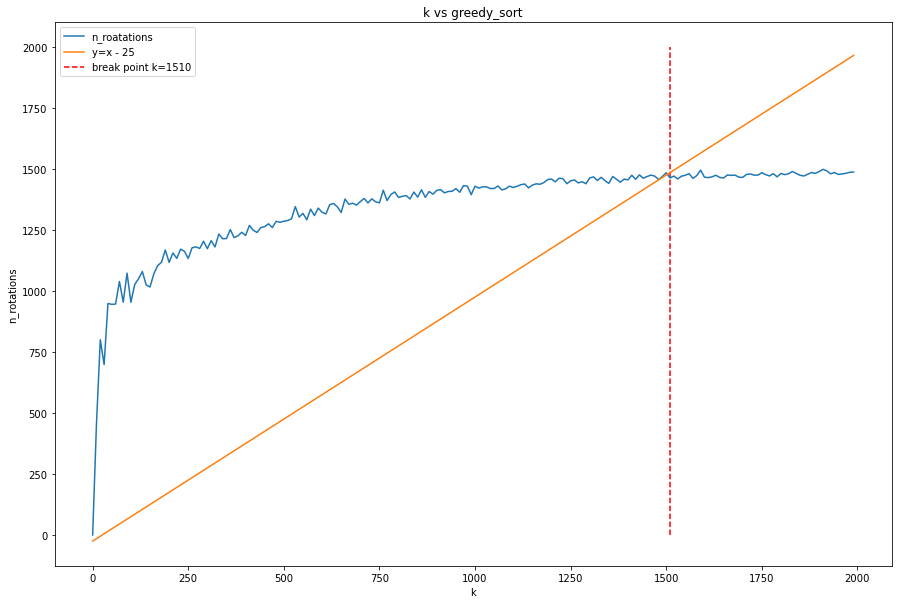

In [15]:
plt.plot(ks, n_rotations_mean, label="n_roatations")
plt.plot(ks, ks - threshold, label=f"y=x - {threshold}")

plt.title("k vs greedy_sort")
plt.ylabel("n_rotations")
plt.xlabel("k")

bp_idx = np.where(ks - n_rotations_mean > threshold)[0][0] 
bp = ks[bp_idx]
plt.vlines(bp, 0, 2 * n, color="r", linestyles="--", label=f"break point k={bp}")

plt.legend()
plt.show()

С ростом кол-ва переворотов они начинают пересекаться, отменяя друг друга, что при кол-ве переворотов `k ~ 1.5 * n` приводит к тому, что алгоритм делает меньше переворотов, чем было сделано при генерации последовательности.

In [16]:
n = 1000
threshold = 25
offset = 50
ks = np.arange(bp - offset, bp + offset)
n_seqs = 50

In [17]:
n_rotations = get_rotations(n, ks, n_seqs)

  0%|          | 0/100 [00:00<?, ?it/s]

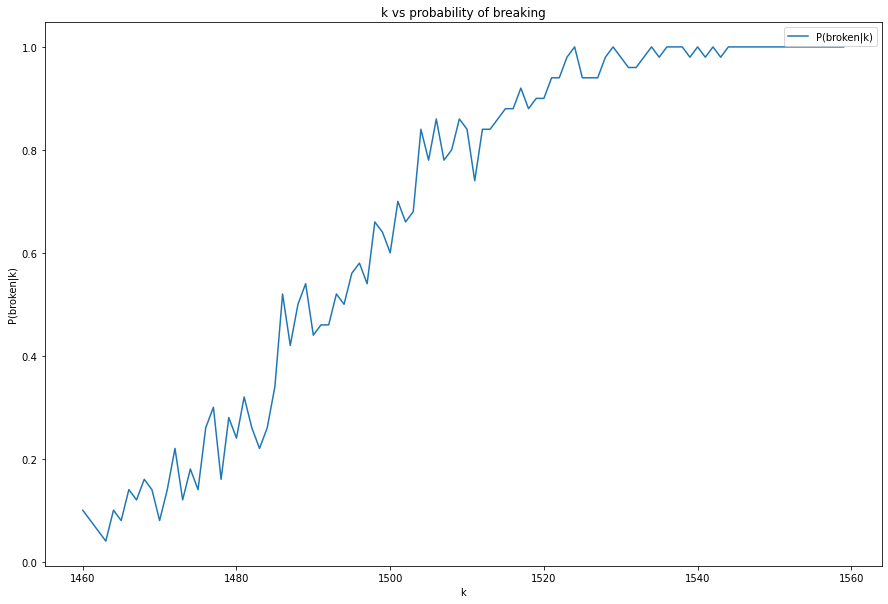

In [18]:
mask = ks[..., None] - n_rotations > threshold
cnts = np.sum(mask, axis=1)
plt.plot(ks, cnts / n_seqs, label="P(broken|k)")
plt.xlabel("k")
plt.ylabel("P(broken|k)")
plt.title("k vs probability of breaking")
plt.legend()
plt.show()

Видно, что с ростом `k` вероятность того, что алгоритм "сломается" на последовательности с `k` переворотами, возрастает.